# Lista de Exercício 3
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 4 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_3.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Murilo Henrique Pasini Trevisan `

`Número USP: 9796078 `

### Introdução:

Nessa lista de exercícios vamos estudar sobre histogramas, transformações de intensidade ponto a ponto, equalização de histogramas, filtros passa-baixa e passa-alta e processamento de pixel de borda. Primeiramente vamos importar as bibliotecas que iremos utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

from scipy.io import loadmat
from IPython.display import HTML
from base64 import b64encode

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [2]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/fotografo.tif?raw=true", "fotografo.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/polem_baixo_contraste.bmp?raw=true", "polem_baixo_contraste.bmp")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/palavrascruzadas.tif?raw=true", "palavrascruzadas.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/mriphantom.tif?raw=true", "mriphantom.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/armadura.tif?raw=true", "armadura.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/pontos.tif?raw=true", "pontos.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/board_ruido.tif?raw=true", "board_ruido.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor


### 1) Visualização de histogramas

Então, o que é histograma? Você pode considerar o histograma como um gráfico ou plotagem, que dá uma ideia geral sobre a distribuição da intensidade dos pixels de uma imagem. É um gráfico que indica os valores de intensidade dos pixels (variando de 0 a 255, caso a quantização seja realizada em 8 bits) no eixo X e o número de pixels na imagem com a intensidade correspondente no eixo Y.

É apenas outra forma de entender a imagem. Olhando para o histograma de uma imagem, você tem uma intuição sobre o contraste, brilho, distribuição de intensidade, etc. Quase todas as ferramentas de processamento de imagem hoje oferecem recursos de histograma. 

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/histograma.png?raw=true" style="width:650px;height:300px;"></center>

<center><caption><b> Figura 1:</b> Legenda.</b></caption></center>
<caption><center> Referência: <a href="https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html">Histograms - OpenCV</a>.</center></caption>

**Exercício:**

1. Mostrar a imagem ```fotografo.tif``` e seu histograma com o número de *bins* diferentes. Utilize ```bins=80``` e ```bins=40``` e **comente os resultados**.

*Dica:* Utilize a função [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html). 

*Ex:*
``` python
plt.hist(myImg.flatten(),bins=XX,density=False,range=(0,255))
```

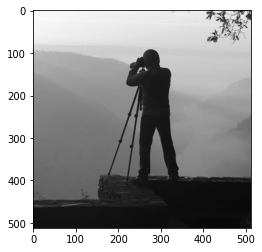

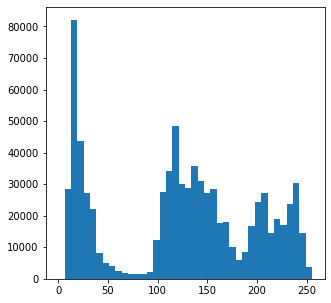

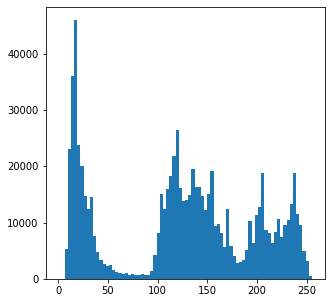

In [3]:
## -- Seu código começa AQUI -- ##

# Leitura da imagem
foto = cv.imread("fotografo.tif")
# apresentação da imagem
plt.imshow(foto)

#plt.figure(figsize = (5,5))
#histograma10 = plt.hist( foto.flatten(), bins=10, range=(0,255))
# Plot do histograma com 40 divisões no eixo x
plt.figure(figsize = (5,5))
histograma40 = plt.hist( foto.flatten(), bins=40, range=(0,255))
# Plot do histograma com 80 divisões no eixo x
plt.figure(figsize = (5,5))
histograma80 = plt.hist( foto.flatten(), bins=80, range=(0,255))
#plt.figure(figsize = (5,5))
#histograma255 = plt.hist( foto.flatten(), bins=255, range=(0,255))



# Podemos notar nas imagens abaixo a distribuição do número de pixels em cada
# nível de cinza da imagem, onde no eixo x temos o valor em nível de cinza da
# imagem, variando de 0 até 255, e em y temos o número de pixels neste nível,
# quando utilizamos um valor de bins menor que o valor total da imagem, os pixels
# são agrupados em valores próximos, de forma a manter no histograma somente o 
# número de bins definida na função, que são no caso 40 e 80.



## -- Seu código termina AQUI -- ##

### 2) Transformação de intensidades

As técnicas de processamento no domínio espacial operam diretamente nos pixels da imagem. A expressão geral para a função de transformação nos níveis de cinza pode ser dada por: 

$$g(x,y) = T[f(x,y)],$$

sendo $f(x,y)$ a imagem de entrada e $g(x,y)$ a imagem de saída ou imagem processada. $T$ é um operador em $f$.


2.1) Transformação linear:

Um exemplo de função de transformação é a linear, tal que:

$$g(x,y) = c \times f(x,y) + b,$$

onde $c$ é uma constante que controla o contraste e $b$, o brilho.

**Exercício:**

1. Aplique uma transformação linear na imagem ```polem_baixo_contraste.bmp``` de modo a alargar seu histograma para toda a faixa de valores de dados do tipo ```uint8```. Ou seja, encontre um valor de $c$ e $b$ para que a imagem esteja na faixa de 0 a 255.

2. Mostre as imagens e os respectivos histogramas antes e depois da transformação. Lembre-se de alterar os limites de visualização da imagem para o range todo para visualizar o efeito do alargamento. **Comente o resultado.**

3. A partir do resultado anterior, aplique uma transformação linear na mesma imagem afim de gerar o seu negativo. Mostre a imagem.

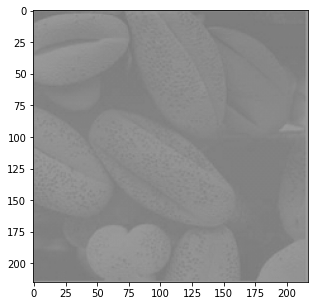

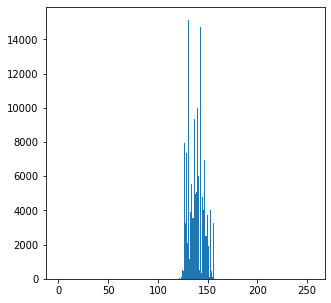

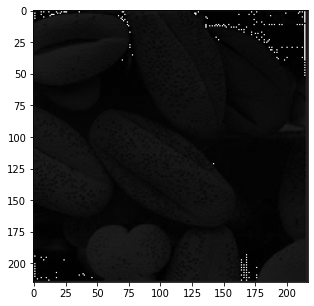

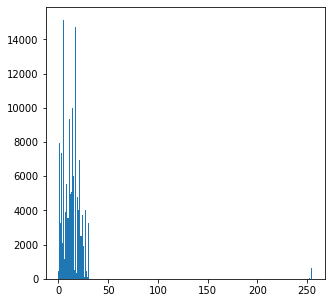

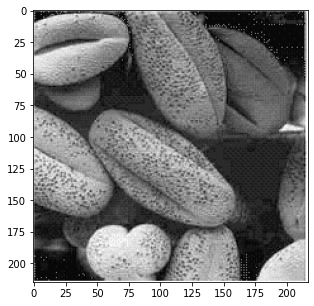

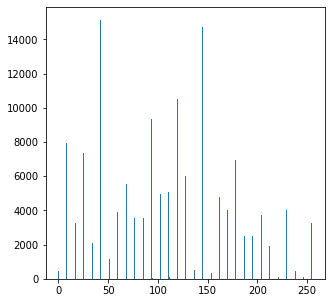

In [15]:
## -- Seu código começa AQUI -- ##

# Importação da imagem usando OpenCV
polem = cv.imread("polem_baixo_contraste.bmp")
# Visualização da imagem
plt.figure(figsize = (5,5))
plt.imshow(polem)
# Visualização do histograma da imagem
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(polem.flatten(), bins = 255, range=(0,255))

# Alteração de brilho
polem2 = polem - 125
plt.figure(figsize = (5,5))
plt.imshow(polem2)
plt.figure(figsize = (5,5))
HistogramaBrilho = plt.hist(polem2.flatten(), bins = 255, range=(0,255))

# Alargamento de contraste

polem3 = polem2 * (255/30)
polem3 = polem3.astype('uint8') # correção para tipo inteiro na imagem
plt.figure(figsize = (5,5))
plt.imshow(polem3) # mostra a nova imagem
plt.figure(figsize = (5,5))
HistogramaContrast = plt.hist(polem3.flatten(), bins = 255, range=(0,255)) # mostra o novo histograma

## -- Seu código termina AQUI -- ##

2.2) Transformação não-linear:

Agora iremos analisar algumas transformações não-lineares. A formula geral da transformação logarítmica ($log$) é dada por:

$$g(x,y) = c * log(f(x,y) + 1),$$

onde $c$ é uma constante. A figura 2 ilustra essa transformação, bem como algumas outras transformações já mencionadas.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/log.png?raw=true" width="353" height="320"></center>

<center><caption><b>Figura 2:</b> Exemplos de transformações ponto a ponto.</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>

A equação da transformação *gamma* é dada por:

$$g(x,y) = c * f(x,y)^\gamma$$

onde $c$ tambem é uma constante. Como no caso da transformação logarítmica, curvas de transformação de potência com valores de $\gamma$ menores que 1 mapeiam uma faixa estreita de valores escuros de entradas em uma faixa mais ampla de valores de saída, com o oposto se aplicando a valores mais altos de níveis de entrada. A figura 3 ilustra como são os formatos das curvas com diferentes valores de *gamma*.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_03/gamma.png?raw=true" width="365" height="330"></center>

<center><caption><b>Figura 3:</b> Curvas com diferentes valores de *gamma*.</b></caption></center>
<caption><center>Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>


**Exercício:**

1. Utilizando a imagem ```mriphantom.tif```, execute as seguintes transformações não-lineares, encontrando o valor mais adequado para a constante c de forma que os níveis de cinza abranjam todo o range de intensidade considerando resolução de 8 bits:

*   ```G1 = np.uint8(c * np.log10(img + 1.0))```
*   ```G2 = np.uint8(c * (img ** 0.28))```

2. Mostrar as imagens e os histogramas resultantes de cada uma das transformações acima.
3. **Comente os resultados** encontrados para cada uma delas, explicando o que a transformação utilizada fez com os níveis de cinza da imagem em relação ao contraste e brilho.


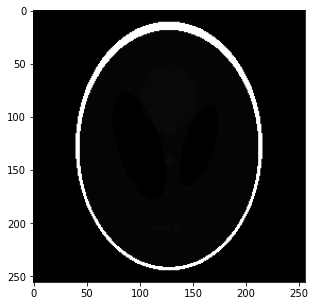

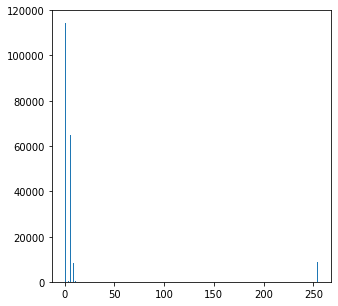

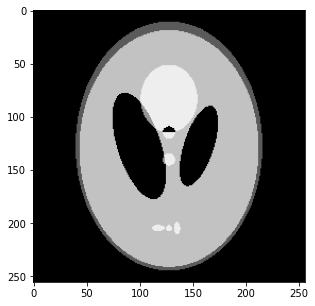

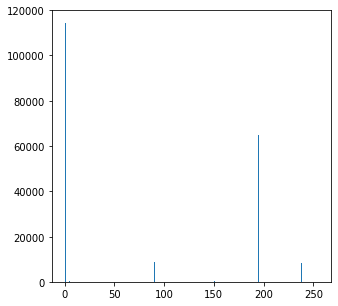

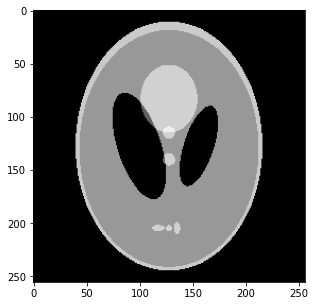

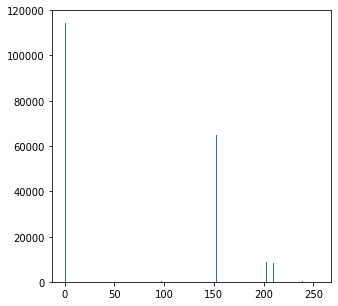

In [5]:
## -- Seu código começa AQUI -- ##

# recebendo a imagem
phantom = cv.imread('mriphantom.tif')
# plotando a imagem original e seu gistograma
plt.figure(figsize = (5,5))
plt.imshow(phantom)
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(phantom.flatten(), bins = 255, range=(0,255))
# Importando as transformações não lineares
c1 = 250
c2 = 260
G1 = np.uint8(c1 * np.log10(phantom + 1.0))
G2 = np.uint8(c2 * (phantom ** 0.28))

# Plotando a transformação log
plt.figure(figsize = (5,5))
plt.imshow(G1)
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(G1.flatten(), bins = 255, range=(0,255))

# Plotando a trabsformação Gamma
plt.figure(figsize = (5,5))
plt.imshow(G2)
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(G2.flatten(), bins = 255, range=(0,255))

# Ambas as transformações tiveram resultados semelhantes, como esperado
# pelo gráfico mostrado acima das transformações não lineares, 
# Transformações gamma com índices menores que 1 se assemelham a transformações
# log, desta forma, o que a transformação fez foi realizar o aumento de 
# contraste na região com maior intensidade de pixels, que era a região com
# baixos níveis de cinza, como pode ser visto no primeiro histograma
# os dois histogramas seguintes demonstram o contraste ocupando toda a faixa de
# intensidade de niveis de cinza, e como visto nas imagens, agora é possível
# identificar visualmente a imagem que estava oculta devido a variação do nivel
# devido a baixa variação de niveis de cinza, imperceptivel aos nossos olhos.

## -- Seu código termina AQUI -- ##

### 3) Equalização de histograma

**Exercício:**

1. Faça a equalização de histograma da imagem ```polem_baixo_contraste.bmp``` utlizando a função [cv.equalizeHist](https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist#equalizehist) do OpenCV.

2. Mostre as imagens e os respectivos histogramas (antes e depois da equalização). **Comente os resultados.** Nota-se diferença com relação ao alargamento de contraste realizado anteriormente com a mesma imagem?


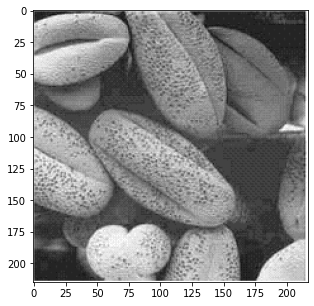

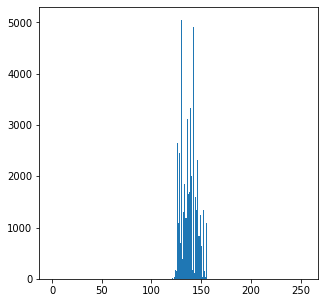

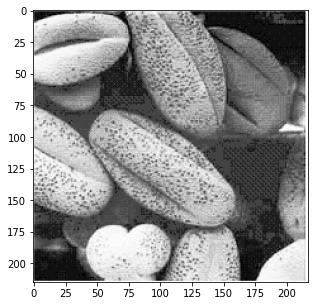

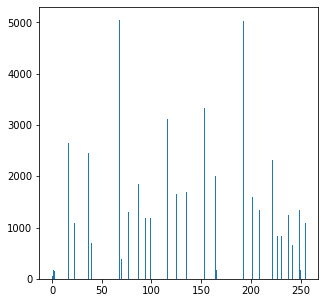

In [19]:
## -- Seu código começa AQUI -- ##

img4 = cv.imread('polem_baixo_contraste.bmp', 0)

# Visualização da imagem
plt.figure(figsize = (5,5))
plt.imshow(img4, 'gray')
# Visualização do histograma da imagem
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(img4.flatten(), bins = 255, range=(0,255))

# Equalização da OpenCV
img = polem4
img = cv.equalizeHist(img, img)

# Plot da imagem equalizada
plt.figure(figsize = (5,5))
plt.imshow(img, 'gray')
# Plot do histograma da imagem equalizada
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(img.flatten(), bins = 255, range=(0,255))

# Pode-se notar a equalização ao olhar para o histograma da nova imagem
# Os pixels estão bem distribuídos na escala de cinza

## -- Seu código termina AQUI -- ##

### 4) Binarização

**Exercicio:**

1. Visualize o histograma da imagem `palavrascruzadas.tif`, defina um limiar (*threshold*) para binarização e realize a operação de transformação para imagem binária. O objetivo é separar ao máximo o que é considerado como peça do que é letra ou fundo da imagem.

2. Apresente a imagem binarizada resultante. 

3. **Comente os resultados**.

*Dica:* Você pode utilizar a função [cv.threshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) - [exemplos aqui](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) ou técnicas regulares de programação *Python*. Utilize ambas para comparar os resultados.

*Ex:*
``` python
cv.threshold(myImg, threshold, 255, cv.THRESH_BINARY)
```

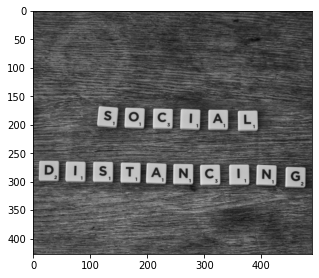

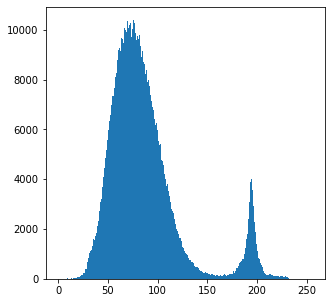

In [20]:
#Visualização de histograma

## -- Seu código começa AQUI -- ##

# Importação das imagens
palavras = cv.imread('palavrascruzadas.tif')

# Plot da imagem e seu histograma
plt.figure(figsize = (5,5))
plt.imshow(palavras)
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(palavras.flatten(), bins = 255, range=(0,255))


## -- Seu código termina AQUI -- ##

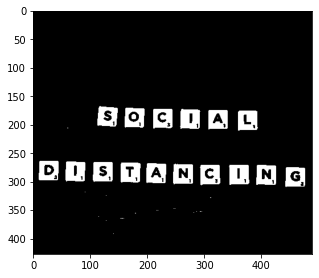

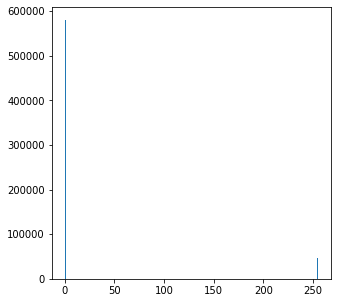

In [49]:
#Binarização

#@title Threshold para binarização{ run: "auto" }
threshold = 158 #@param {type:"slider", min:0, max:255, step:1}

## -- Seu código começa AQUI -- ##
# threshold da imagem
ret,binary = cv.threshold(palavras, threshold, 255, cv.THRESH_BINARY)

# Plot da imagem
plt.figure(figsize = (5,5))
plt.imshow(binary, 'gray')

# Plot do histograma
plt.figure(figsize = (5,5))
HistogramaBaixa = plt.hist(binary.flatten(), bins = 255, range=(0,255))


## -- Seu código termina AQUI -- ##